Import libraries

In [0]:
import numpy as np
import os
import tensorflow as tf
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

Import Noisy Images

In [0]:
bad_frames = '/content/drive/My Drive/natural-images/random'

In [3]:
noisy_frames = []
for file in tqdm(sorted(os.listdir(bad_frames))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(bad_frames + '/' + file, target_size=(256,256))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    noisy_frames.append(image)

noisy_frames = np.array(noisy_frames)

In [4]:
print(noisy_frames.shape)

(6899, 256, 256, 3)


Import Clean Images

In [0]:
good_frames = '/content/drive/My Drive/natural-images/natural_images'

In [6]:
clean_frames = []
for file in tqdm(sorted(os.listdir(good_frames))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(good_frames + '/' + file, target_size=(256,256))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    clean_frames.append(image)

clean_frames = np.array(clean_frames)

In [7]:
print(clean_frames.shape)

(6899, 256, 256, 3)


Split Images Into Training & Test

In [8]:
round(len(noisy_frames)*0.8)

5519

In [0]:
#80% of images to training set
noisy_train = noisy_frames[0:round(len(noisy_frames)*0.8)]
noisy_test = noisy_frames[round(len(noisy_frames)*0.8):]

clean_train = clean_frames[0:round(len(clean_frames)*0.8)]
clean_test = clean_frames[round(len(clean_frames)*0.8):]

Autoencoder

In [0]:
autoencoder = tf.keras.models.Sequential()
#Layer 1
autoencoder.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', input_shape = (256, 256, 3)))
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 3
autoencoder.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 4
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 5
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 6
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 7
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 8
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 32, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 9
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 64, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 11
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 3, kernel_size = (3,3), activation = 'sigmoid', padding = 'same'))

In [11]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      18464     
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 16)      4624      
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 16)      6

In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
history = autoencoder.fit(noisy_train, clean_train, epochs=50, validation_data=(noisy_test, clean_test))

Epoch 1/50
173/173 [==============================] - 53s 306ms/step - loss: 0.5677 - val_loss: 0.6405
Epoch 2/50
173/173 [==============================] - 52s 301ms/step - loss: 0.5543 - val_loss: 0.5646
Epoch 3/50
173/173 [==============================] - 52s 301ms/step - loss: 0.5529 - val_loss: 0.5868
Epoch 4/50
173/173 [==============================] - 52s 301ms/step - loss: 0.5496 - val_loss: 0.5739
Epoch 5/50
173/173 [==============================] - 52s 301ms/step - loss: 0.5492 - val_loss: 0.6254
Epoch 6/50
173/173 [==============================] - 52s 301ms/step - loss: 0.5483 - val_loss: 0.5745
Epoch 7/50
173/173 [==============================] - 52s 301ms/step - loss: 0.5469 - val_loss: 0.7044
Epoch 8/50
173/173 [==============================] - 52s 301ms/step - loss: 0.5461 - val_loss: 0.5458
Epoch 9/50
173/173 [==============================] - 52s 301ms/step - loss: 0.5461 - val_loss: 0.5492
Epoch 10/50
173/173 [==============================] - 52s 302ms/step - l

Model History

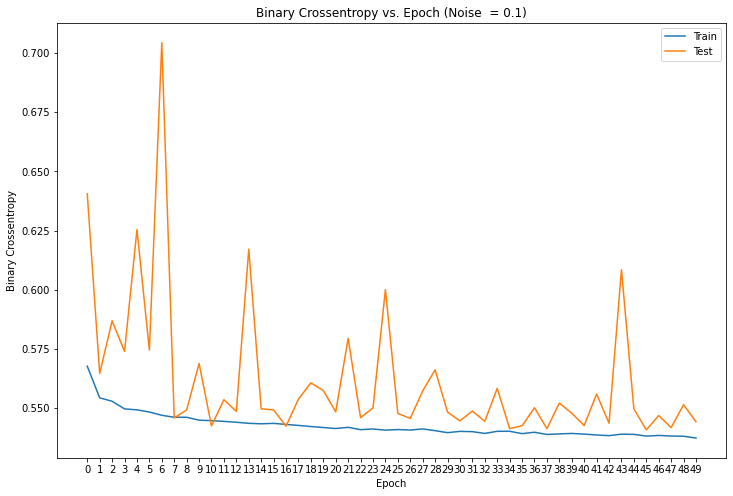

In [14]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'])
plt.title('Binary Crossentropy vs. Epoch (Noise  = 0.1)')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.xticks(ticks=history.epoch, labels=history.epoch)
plt.show()

Test Autoencoder

In [0]:
results = autoencoder.predict(noisy_test)

In [0]:
image = np.random.randint(0, len(noisy_test))

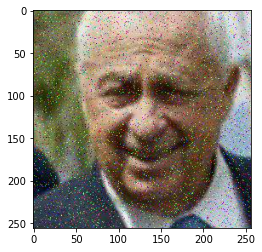

In [27]:
plt.imshow(noisy_test[image])
plt.show()

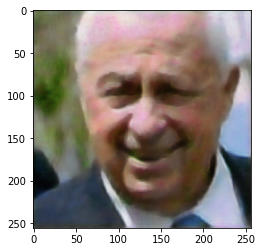

In [28]:
plt.imshow(results[image])
plt.show()

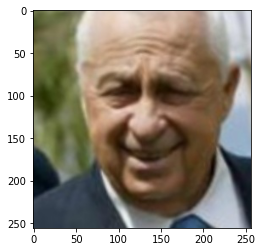

In [29]:
plt.imshow(clean_test[image])
plt.show()